# HEALTH CARE DATASET

## OBSERVING THE DATASET

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Loading the dataset using read_csv() method

In [4]:
hr = pd.read_csv("Healthcare.csv")

### Observing the entire dataset

In [3]:
hr

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


### Observing shape, columns and information of dataset

In [4]:
hr.shape # gives no. of rows and columns in dataset

(1676, 35)

In [5]:
hr.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1676 entries, 0 to 1675
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeID                1676 non-null   int64 
 1   Age                       1676 non-null   int64 
 2   Attrition                 1676 non-null   object
 3   BusinessTravel            1676 non-null   object
 4   DailyRate                 1676 non-null   int64 
 5   Department                1676 non-null   object
 6   DistanceFromHome          1676 non-null   int64 
 7   Education                 1676 non-null   int64 
 8   EducationField            1676 non-null   object
 9   EmployeeCount             1676 non-null   int64 
 10  EnvironmentSatisfaction   1676 non-null   int64 
 11  Gender                    1676 non-null   object
 12  HourlyRate                1676 non-null   int64 
 13  JobInvolvement            1676 non-null   int64 
 14  JobLevel                

### Printing first and last given no. of rows from the dataset

In [7]:
hr.head() # gives first 5 rows

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2


In [8]:
hr.head(100) # gives first 100 rows

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,...,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,...,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,...,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,...,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1293078,54,No,Travel_Rarely,1217,Neurology,2,4,Technical Degree,1,...,1,80,1,16,5,1,4,3,0,3
96,1026798,24,No,Travel_Rarely,1353,Cardiology,3,2,Other,1,...,1,80,1,4,2,2,3,2,0,2
97,1500402,28,No,Non-Travel,120,Cardiology,4,3,Medical,1,...,2,80,0,5,3,4,5,4,0,4
98,1514098,58,No,Travel_Rarely,682,Cardiology,10,4,Medical,1,...,3,80,0,38,1,2,37,10,1,8


In [9]:
hr.tail() # gives last 5 rows

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8
1675,1152329,27,No,Travel_Rarely,511,Cardiology,2,2,Medical,1,...,2,80,0,9,5,2,8,7,0,7


In [10]:
hr.tail(100) # gives last 100 rows

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1576,1200749,34,No,Travel_Rarely,401,Neurology,1,3,Life Sciences,1,...,1,80,1,7,2,2,5,4,0,2
1577,1633070,55,No,Travel_Rarely,282,Maternity,2,2,Medical,1,...,4,80,1,23,5,3,19,9,9,11
1578,1066528,38,No,Non-Travel,1336,Neurology,2,3,Human Resources,1,...,4,80,3,13,3,3,11,10,3,8
1579,1157111,37,No,Travel_Rarely,309,Cardiology,10,4,Life Sciences,1,...,3,80,3,8,5,3,1,0,0,0
1580,1792052,29,No,Travel_Rarely,665,Maternity,15,3,Life Sciences,1,...,1,80,0,6,1,3,6,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,1117656,26,Yes,Travel_Rarely,471,Neurology,24,3,Technical Degree,1,...,2,80,0,1,3,1,1,0,0,0
1672,1152327,46,No,Travel_Rarely,1125,Cardiology,10,3,Marketing,1,...,3,80,1,15,3,3,3,2,1,2
1673,1812428,20,No,Travel_Rarely,959,Maternity,1,3,Life Sciences,1,...,4,80,0,1,0,4,1,0,0,0
1674,1812429,39,No,Travel_Rarely,466,Neurology,1,1,Life Sciences,1,...,3,80,1,21,3,3,21,6,11,8


### Observing whether there are any missing values in the dataset

In [11]:
hr.isnull().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# EMPLOYEE EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

### check unique values in the column

In [12]:
print(hr.apply(lambda col: col.unique().sum()))

EmployeeID                                                         2441589628
Age                                                                      1677
Attrition                                                               NoYes
BusinessTravel                       Travel_RarelyTravel_FrequentlyNon-Travel
DailyRate                                                              710161
Department                                       CardiologyMaternityNeurology
DistanceFromHome                                                          435
Education                                                                  15
EducationField              Life SciencesOtherMedicalMarketingTechnical De...
EmployeeCount                                                               1
EnvironmentSatisfaction                                                    10
Gender                                                             FemaleMale
HourlyRate                                                      

### Age

In [13]:
x = hr.groupby("Age")["Attrition"]
print(x.value_counts())

Age  Attrition
18   Yes           5
     No            3
19   Yes           7
     No            3
20   Yes           8
                  ..
57   No            4
58   No           14
     Yes           3
59   No           10
60   No            5
Name: Attrition, Length: 80, dtype: int64


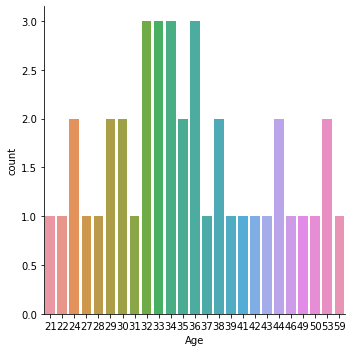

In [14]:
sns.catplot(data = hr[:40], x = "Age", kind = "count")

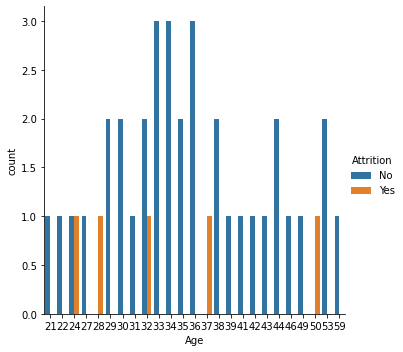

In [15]:
sns.catplot(data = hr[:40], x = "Age", hue = "Attrition", kind = "count")

### Attrition

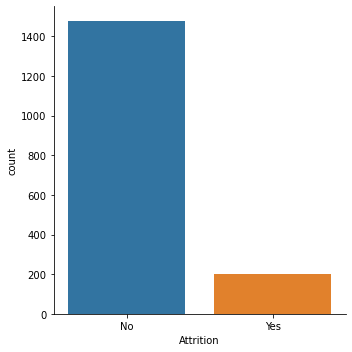

In [16]:
sns.catplot(data = hr, x = "Attrition", kind = "count")

### BusinessTravel 

BusinessTravel     Attrition
Non-Travel         No            156
                   Yes            16
Travel_Frequently  No            263
                   Yes            57
Travel_Rarely      No           1058
                   Yes           126
Name: Attrition, dtype: int64


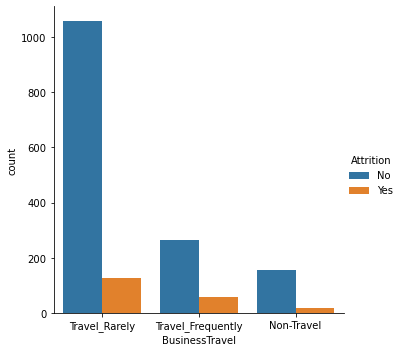

In [17]:
print(hr.groupby("BusinessTravel")["Attrition"].value_counts())
sns.catplot(data = hr, x = "BusinessTravel", hue = "Attrition", kind = "count")

### Daily Rate

DailyRate  Attrition
102        No           2
103        Yes          1
104        Yes          1
105        No           1
106        No           1
                       ..
1492       No           1
1495       No           3
1496       No           2
1498       No           1
1499       No           1
Name: Attrition, Length: 998, dtype: int64


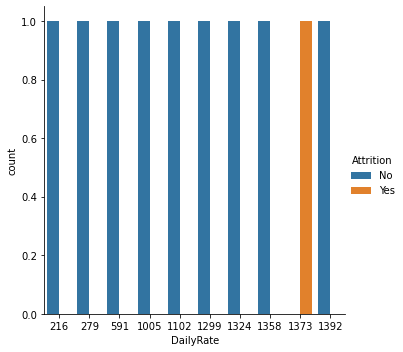

In [18]:
print(hr.groupby("DailyRate")["Attrition"].value_counts())
sns.catplot(data = hr[:10], x = "DailyRate", hue = "Attrition", kind = "count")

### Department

Department  Attrition
Cardiology  No           457
            Yes           74
Maternity   No           698
            Yes           98
Neurology   No           322
            Yes           27
Name: Attrition, dtype: int64


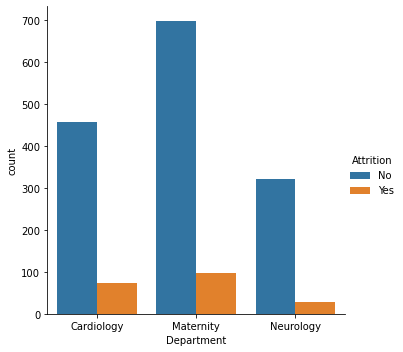

In [19]:
print(hr.groupby("Department")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Department", hue = "Attrition", kind = "count")

### DistanceFromHome

DistanceFromHome  Attrition
1                 No           218
                  Yes           21
2                 No           220
                  Yes           21
3                 No            85
                  Yes           11
4                 No            65
                  Yes            4
5                 No            66
                  Yes           10
6                 No            64
                  Yes            8
7                 No            88
                  Yes            7
8                 No            80
                  Yes            9
9                 No            79
                  Yes           14
10                No            91
                  Yes            8
11                No            31
                  Yes            2
12                No            17
                  Yes            3
13                No            18
                  Yes            4
14                No            17
                  Yes      

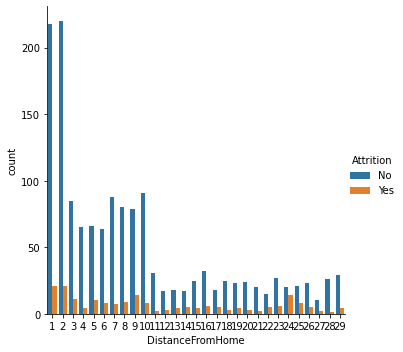

In [20]:
print(hr.groupby("DistanceFromHome")["Attrition"].value_counts())
sns.catplot(data = hr, x = "DistanceFromHome", hue = "Attrition", kind = "count")

### Education

Education  Attrition
1          No           169
           Yes           27
2          No           287
           Yes           35
3          No           566
           Yes           89
4          No           400
           Yes           47
5          No            55
           Yes            1
Name: Attrition, dtype: int64


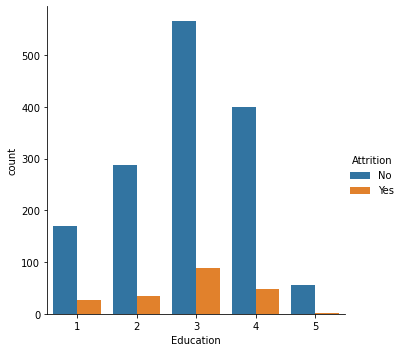

In [21]:
print(hr.groupby("Education")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Education", hue = "Attrition", kind = "count")

### EducationField

EducationField    Attrition
Human Resources   No            23
                  Yes            6
Life Sciences     No           613
                  Yes           84
Marketing         No           161
                  Yes           28
Medical           No           473
                  Yes           51
Other             No            80
                  Yes            8
Technical Degree  No           127
                  Yes           22
Name: Attrition, dtype: int64


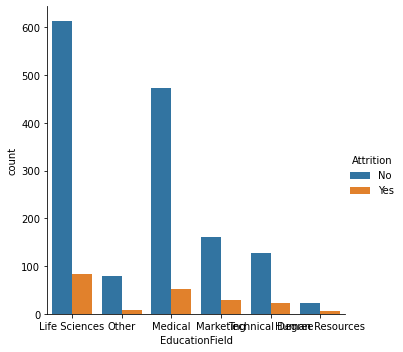

In [22]:
print(hr.groupby("EducationField")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EducationField", hue = "Attrition", kind = "count")

### EmployeeCount

EmployeeCount  Attrition
1              No           1477
               Yes           199
Name: Attrition, dtype: int64


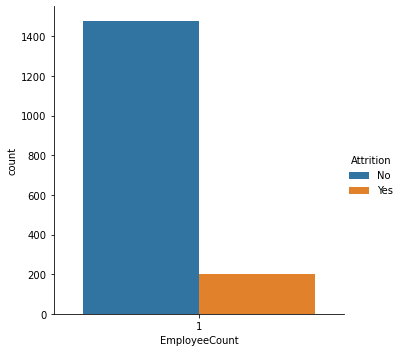

In [23]:
print(hr.groupby("EmployeeCount")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EmployeeCount", hue = "Attrition", kind = "count")

### EmployeeID

EmployeeID  Attrition
1025177     No           1
1026798     No           1
1026975     No           1
1028391     No           1
1028630     No           1
                        ..
1884938     No           1
1884939     Yes          1
1885928     No           1
1886039     No           1
1886378     No           1
Name: Attrition, Length: 1676, dtype: int64


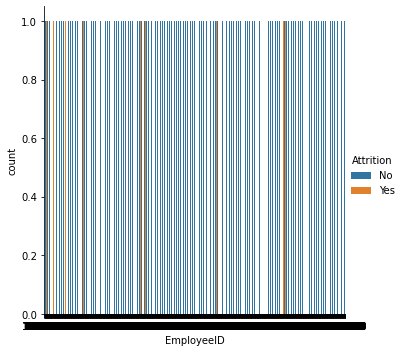

In [24]:
print(hr.groupby("EmployeeID")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EmployeeID", hue = "Attrition", kind = "count")

### EnvironmentSatisfaction

EnvironmentSatisfaction  Attrition
1                        No           266
                         Yes           64
2                        No           288
                         Yes           38
3                        No           464
                         Yes           48
4                        No           459
                         Yes           49
Name: Attrition, dtype: int64


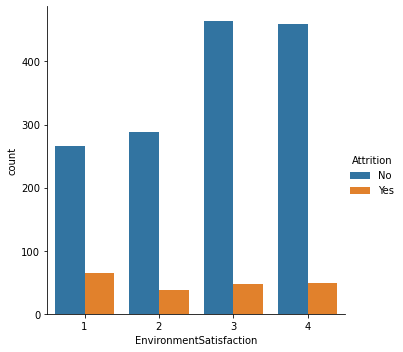

In [25]:
print(hr.groupby("EnvironmentSatisfaction")["Attrition"].value_counts())
sns.catplot(data = hr, x = "EnvironmentSatisfaction", hue = "Attrition", kind = "count")

### Gender

Gender  Attrition
Female  No           592
        Yes           86
Male    No           885
        Yes          113
Name: Attrition, dtype: int64


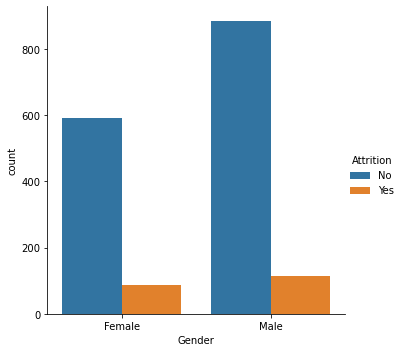

In [26]:
print(hr.groupby("Gender")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Gender", hue = "Attrition", kind = "count")

### HourlyRate

HourlyRate  Attrition
30          No           20
31          No           16
            Yes           2
32          No           23
            Yes           3
                         ..
98          Yes           3
99          No           19
            Yes           1
100         No           17
            Yes           4
Name: Attrition, Length: 137, dtype: int64


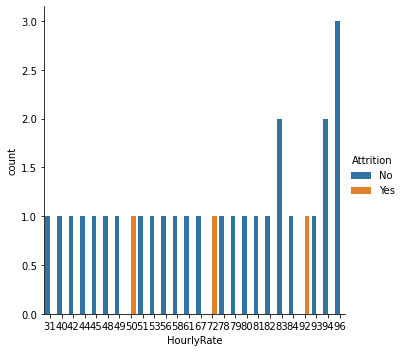

In [27]:
print(hr.groupby("HourlyRate")["Attrition"].value_counts())
sns.catplot(data = hr[:30], x = "HourlyRate", hue = "Attrition", kind = "count")

### JobInvolvement

JobInvolvement  Attrition
1               No            67
                Yes           29
2               No           362
                Yes           71
3               No           894
                Yes           89
4               No           154
                Yes           10
Name: Attrition, dtype: int64


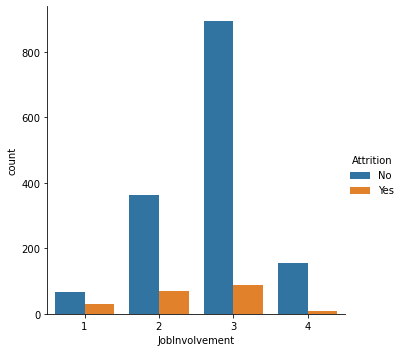

In [28]:
print(hr.groupby("JobInvolvement")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobInvolvement", hue = "Attrition", kind = "count")

### JobLevel

JobLevel  Attrition
1         No           479
          Yes          142
2         No           572
          Yes           34
3         No           228
          Yes           18
4         No           119
          Yes            3
5         No            79
          Yes            2
Name: Attrition, dtype: int64


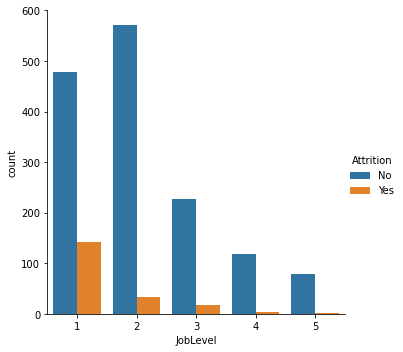

In [29]:
print(hr.groupby("JobLevel")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobLevel", hue = "Attrition", kind = "count")

### JobRole

JobRole         Attrition
Admin           No            16
Administrative  No           114
                Yes            1
Nurse           No           715
                Yes          107
Other           No           447
                Yes           87
Therapist       No           185
                Yes            4
Name: Attrition, dtype: int64


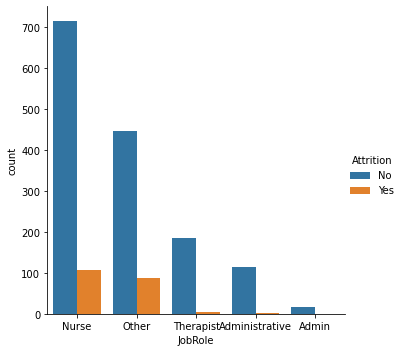

In [30]:
print(hr.groupby("JobRole")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobRole", hue = "Attrition", kind = "count")

### JobSatisfaction

JobSatisfaction  Attrition
1                No           277
                 Yes           52
2                No           268
                 Yes           42
3                No           447
                 Yes           60
4                No           485
                 Yes           45
Name: Attrition, dtype: int64


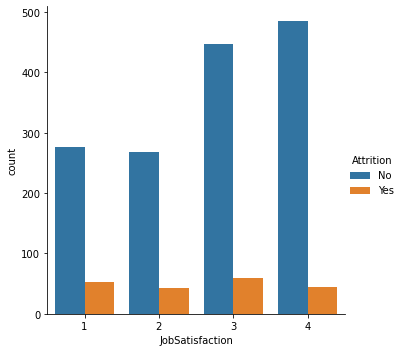

In [31]:
print(hr.groupby("JobSatisfaction")["Attrition"].value_counts())
sns.catplot(data = hr, x = "JobSatisfaction", hue = "Attrition", kind = "count")

### MaritalStatus

MaritalStatus  Attrition
Divorced       No           353
               Yes           24
Married        No           716
               Yes           61
Single         No           408
               Yes          114
Name: Attrition, dtype: int64


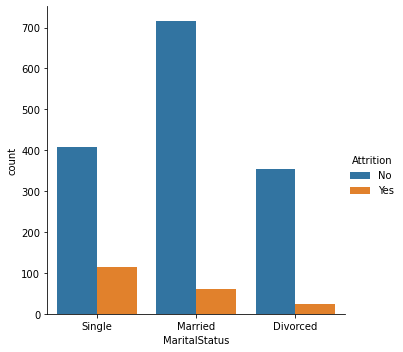

In [32]:
print(hr.groupby("MaritalStatus")["Attrition"].value_counts())
sns.catplot(data = hr, x = "MaritalStatus", hue = "Attrition", kind = "count")

### MonthlyIncome

MonthlyIncome  Attrition
1009           Yes          1
1051           No           1
1052           No           1
1081           Yes          1
1091           Yes          1
                           ..
19859          Yes          1
19926          No           1
19943          No           1
19973          No           1
19999          No           1
Name: Attrition, Length: 1392, dtype: int64


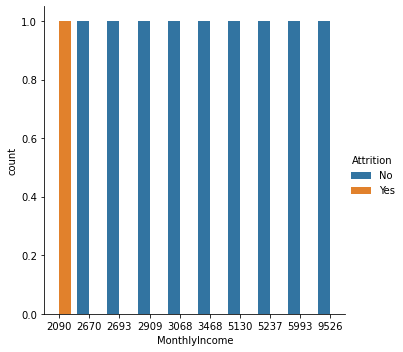

In [33]:
print(hr.groupby("MonthlyIncome")["Attrition"].value_counts())
sns.catplot(data = hr[:10], x = "MonthlyIncome", hue = "Attrition", kind = "count")

### MonthlyRate

MonthlyRate  Attrition
2094         No           1
2097         No           2
2104         No           2
2112         No           1
2122         No           1
                         ..
26956        Yes          1
26959        Yes          1
26968        No           1
26997        No           1
26999        Yes          1
Name: Attrition, Length: 1454, dtype: int64


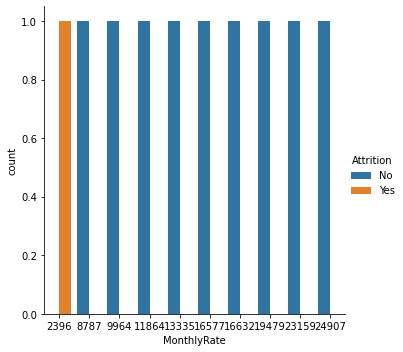

In [34]:
print(hr.groupby("MonthlyRate")["Attrition"].value_counts())
sns.catplot(data = hr[:10], x = "MonthlyRate", hue = "Attrition", kind = "count")

### NumCompaniesWorked

NumCompaniesWorked  Attrition
0                   No           203
                    Yes           20
1                   No           508
                    Yes           93
2                   No           163
                    Yes           10
3                   No           170
                    Yes           10
4                   No           145
                    Yes           11
5                   No            58
                    Yes           12
6                   No            64
                    Yes           15
7                   No            68
                    Yes           16
8                   No            47
                    Yes            4
9                   No            51
                    Yes            8
Name: Attrition, dtype: int64


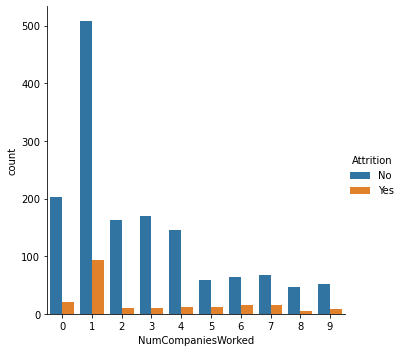

In [35]:
print(hr.groupby("NumCompaniesWorked")["Attrition"].value_counts())
sns.catplot(data = hr, x = "NumCompaniesWorked", hue = "Attrition", kind = "count")

### Over18

Over18  Attrition
Y       No           1477
        Yes           199
Name: Attrition, dtype: int64


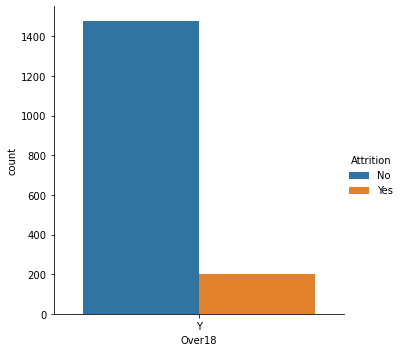

In [36]:
print(hr.groupby("Over18")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Over18", hue = "Attrition", kind = "count")

### OverTime

OverTime  Attrition
No        No           1140
          Yes            60
Yes       No            337
          Yes           139
Name: Attrition, dtype: int64


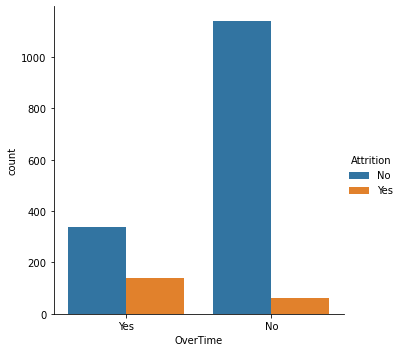

In [37]:
print(hr.groupby("OverTime")["Attrition"].value_counts())
sns.catplot(data = hr, x = "OverTime", hue = "Attrition", kind = "count")

### PercentSalaryHike

PercentSalaryHike  Attrition
11                 No           208
                   Yes           33
12                 No           203
                   Yes           24
13                 No           202
                   Yes           34
14                 No           209
                   Yes           20
15                 No           102
                   Yes           12
16                 No            80
                   Yes            9
17                 No            84
                   Yes            9
18                 No            88
                   Yes           15
19                 No            81
                   Yes           11
20                 No            55
                   Yes            8
21                 No            50
                   Yes            4
22                 No            51
                   Yes            9
23                 No            25
                   Yes            6
24                 No            19

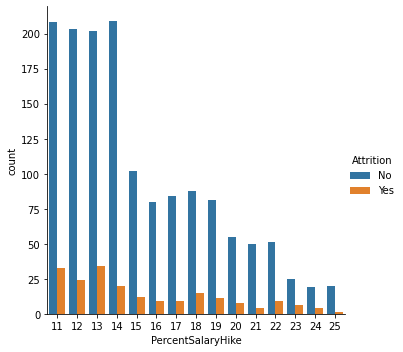

In [38]:
print(hr.groupby("PercentSalaryHike")["Attrition"].value_counts())
sns.catplot(data = hr, x = "PercentSalaryHike", hue = "Attrition", kind = "count")

### PerformanceRating

PerformanceRating  Attrition
3                  No           1257
                   Yes           167
4                  No            220
                   Yes            32
Name: Attrition, dtype: int64


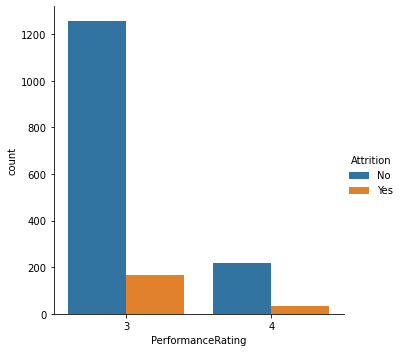

In [39]:
print(hr.groupby("PerformanceRating")["Attrition"].value_counts())
sns.catplot(data = hr, x = "PerformanceRating", hue = "Attrition", kind = "count")

### RelationshipSatisfaction

RelationshipSatisfaction  Attrition
1                         No           270
                          Yes           40
2                         No           306
                          Yes           40
3                         No           459
                          Yes           67
4                         No           442
                          Yes           52
Name: Attrition, dtype: int64


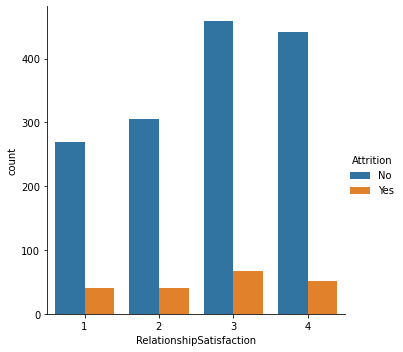

In [40]:
print(hr.groupby("RelationshipSatisfaction")["Attrition"].value_counts())
sns.catplot(data = hr, x = "RelationshipSatisfaction", hue = "Attrition", kind = "count")

### StandardHours

StandardHours  Attrition
80             No           1477
               Yes           199
Name: Attrition, dtype: int64


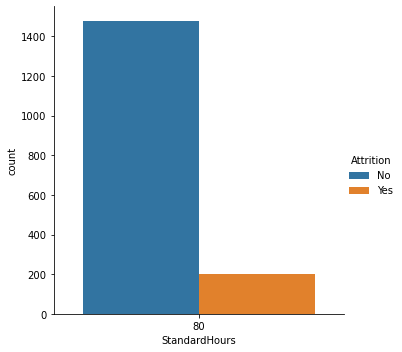

In [41]:
print(hr.groupby("StandardHours")["Attrition"].value_counts())
sns.catplot(data = hr, x = "StandardHours", hue = "Attrition", kind = "count")

### Shift

Shift  Attrition
0      No           568
       Yes          140
1      No           642
       Yes           42
2      No           179
       Yes            6
3      No            88
       Yes           11
Name: Attrition, dtype: int64


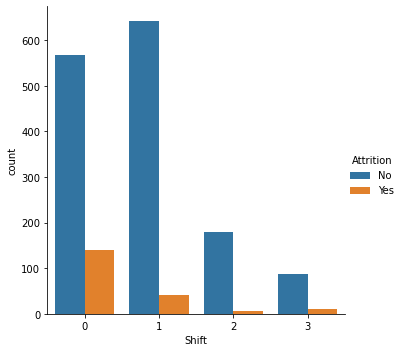

In [42]:
print(hr.groupby("Shift")["Attrition"].value_counts())
sns.catplot(data = hr, x = "Shift", hue = "Attrition", kind = "count")

### TotalWorkingYears

TotalWorkingYears  Attrition
0                  Yes           6
                   No            5
1                  No           47
                   Yes          47
2                  No           26
                                ..
36                 No            7
37                 No            4
38                 No            1
40                 No            1
                   Yes           1
Name: Attrition, Length: 66, dtype: int64


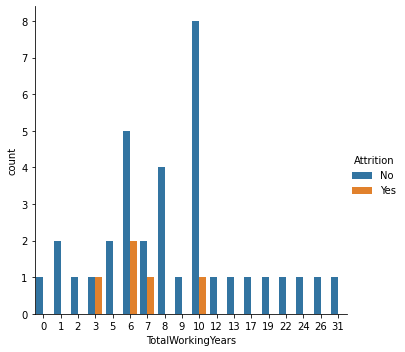

In [43]:
print(hr.groupby("TotalWorkingYears")["Attrition"].value_counts())
sns.catplot(data = hr[:40], x = "TotalWorkingYears", hue = "Attrition", kind = "count")

### TrainingTimesLastYear

TrainingTimesLastYear  Attrition
0                      No            48
                       Yes           13
1                      No            79
                       Yes            5
2                      No           519
                       Yes           92
3                      No           516
                       Yes           51
4                      No           125
                       Yes           18
5                      No           123
                       Yes           14
6                      No            67
                       Yes            6
Name: Attrition, dtype: int64


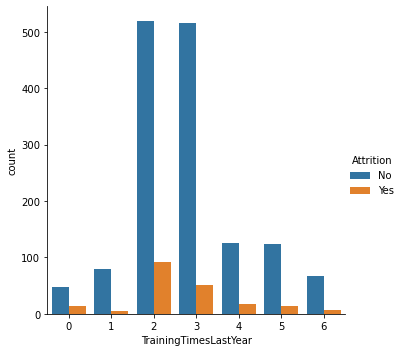

In [44]:
print(hr.groupby("TrainingTimesLastYear")["Attrition"].value_counts())
sns.catplot(data = hr, x = "TrainingTimesLastYear", hue = "Attrition", kind = "count")

### WorkLifeBalance

WorkLifeBalance  Attrition
1                No            66
                 Yes           24
2                No           331
                 Yes           54
3                No           928
                 Yes          100
4                No           152
                 Yes           21
Name: Attrition, dtype: int64


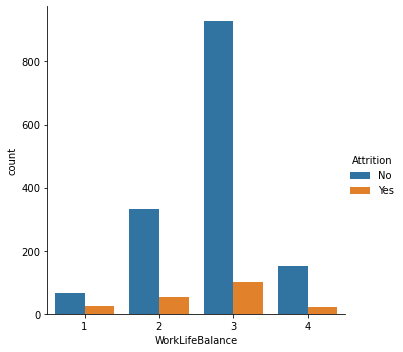

In [45]:
print(hr.groupby("WorkLifeBalance")["Attrition"].value_counts())
sns.catplot(data = hr, x = "WorkLifeBalance", hue = "Attrition", kind = "count")

### YearsAtCompany

YearsAtCompany  Attrition
0               No            28
                Yes           18
1               No           136
                Yes           59
2               No           116
                Yes           30
3               No           135
                Yes           17
4               No           106
                Yes           14
5               No           200
                Yes           19
6               No            81
                Yes            5
7               No            94
                Yes           10
8               No            87
                Yes            6
9               No            91
                Yes            3
10              No           126
                Yes           11
11              No            36
                Yes            1
12              No            17
13              No            28
14              No            19
                Yes            1
15              No            21
                Y

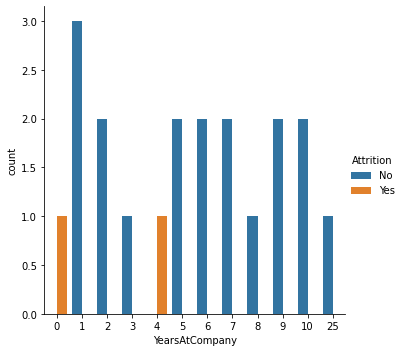

In [46]:
print(hr.groupby("YearsAtCompany")["Attrition"].value_counts())
sns.catplot(data = hr[:20], x = "YearsAtCompany", hue = "Attrition", kind = "count")

### YearsInCurrentRole

YearsInCurrentRole  Attrition
0                   No           200
                    Yes           73
1                   No            51
                    Yes           10
2                   No           369
                    Yes           65
3                   No           137
                    Yes            9
4                   No           102
                    Yes           12
5                   No            42
                    Yes            1
6                   No            42
                    Yes            1
7                   No           236
                    Yes           21
8                   No           102
                    Yes            2
9                   No            75
                    Yes            4
10                  No            33
11                  No            26
12                  No            11
13                  No            16
14                  No            12
15                  No             8
        

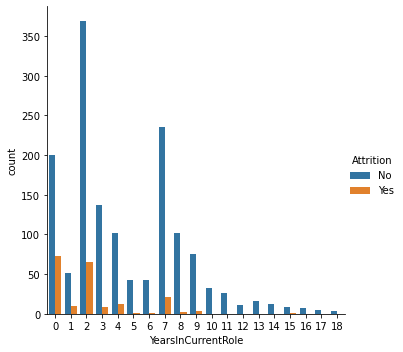

In [47]:
print(hr.groupby("YearsInCurrentRole")["Attrition"].value_counts())
sns.catplot(data = hr, x = "YearsInCurrentRole", hue = "Attrition", kind = "count")

### YearsSinceLastPromotion

YearsSinceLastPromotion  Attrition
0                        No           554
                         Yes          106
1                        No           365
                         Yes           37
2                        No           159
                         Yes           27
3                        No            60
                         Yes            6
4                        No            61
                         Yes            2
5                        No            49
                         Yes            1
6                        No            39
                         Yes            2
7                        No            72
                         Yes           11
8                        No            21
9                        No            18
                         Yes            2
10                       No             5
                         Yes            2
11                       No            29
                         Yes            1

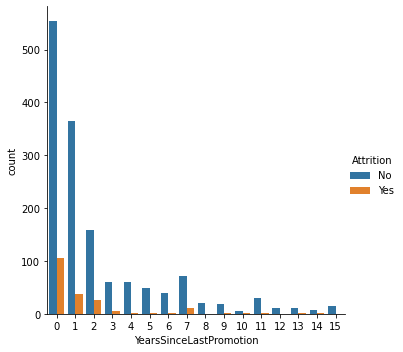

In [48]:
print(hr.groupby("YearsSinceLastPromotion")["Attrition"].value_counts())
sns.catplot(data = hr, x = "YearsSinceLastPromotion", hue = "Attrition", kind = "count")

### YearsWithCurrManager

YearsWithCurrManager  Attrition
0                     No           212
                      Yes           85
1                     No            74
                      Yes            9
2                     No           353
                      Yes           51
3                     No           141
                      Yes           14
4                     No           101
                      Yes            7
5                     No            35
6                     No            33
                      Yes            1
7                     No           228
                      Yes           19
8                     No           116
                      Yes            6
9                     No            74
                      Yes            3
10                    No            28
                      Yes            4
11                    No            25
12                    No            21
13                    No            16
14                    No        

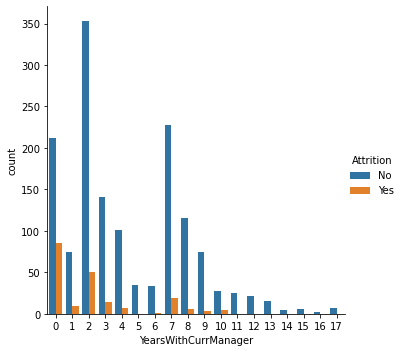

In [49]:
print(hr.groupby("YearsWithCurrManager")["Attrition"].value_counts())
sns.catplot(data = hr, x = "YearsWithCurrManager", hue = "Attrition", kind = "count")

In [5]:
hr.columns

Index(['EmployeeID', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'Shift',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
hr.shape

(1676, 35)

In [7]:
hr = hr.drop(['EmployeeID',
                 'EmployeeCount',
                 'Over18',
                  'StandardHours'],axis = 1)

In [8]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [9]:
hr.shape

(1676, 31)

## FEATURE ENGINEERING

In [10]:
X = hr.drop("Attrition",axis=1)
y = hr["Attrition"]

In [11]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((1173, 30), (503, 30))

In [13]:
X_train.corr()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.002771,-0.015052,0.172209,-0.034631,0.047313,0.060094,0.517141,0.012782,0.513182,...,0.022981,0.088181,0.011919,0.682904,-0.015154,-0.036471,0.307999,0.214164,0.218155,0.186471
DailyRate,0.002771,1.000000,-0.025438,0.017368,0.007386,0.045007,0.060738,0.016086,0.033519,0.022171,...,-0.012493,0.003819,0.057523,0.021855,0.013671,-0.030083,-0.018298,0.023475,-0.048805,-0.023850
DistanceFromHome,-0.015052,-0.025438,1.000000,0.030709,-0.015388,0.037880,0.013268,-0.031601,0.003924,-0.050363,...,0.016146,0.006537,0.053779,-0.015840,-0.047368,-0.029972,0.017233,0.026843,-0.000499,0.029751
Education,0.172209,0.017368,0.030709,1.000000,-0.051906,0.016006,0.040560,0.102605,-0.015804,0.095778,...,-0.007444,0.012010,0.021140,0.125627,-0.010417,0.013790,0.029362,0.022553,0.040271,0.008773
EnvironmentSatisfaction,-0.034631,0.007386,-0.015388,-0.051906,1.000000,-0.043286,-0.004978,-0.005962,0.028189,-0.002681,...,-0.010748,-0.028771,-0.001289,-0.015050,-0.047649,0.032387,-0.004831,0.018099,0.017437,-0.021923
HourlyRate,0.047313,0.045007,0.037880,0.016006,-0.043286,1.000000,0.028393,-0.006710,-0.093894,0.001611,...,-0.024957,0.025066,0.049031,0.012934,-0.011061,0.002325,-0.023262,-0.022499,-0.036478,-0.033516
JobInvolvement,0.060094,0.060738,0.013268,0.040560,-0.004978,0.028393,1.000000,-0.002514,-0.054958,-0.015349,...,-0.023183,0.050428,0.002906,0.017368,-0.037230,-0.005143,0.004196,0.031136,-0.003710,0.048367
JobLevel,0.517141,0.016086,-0.031601,0.102605,-0.005962,-0.006710,-0.002514,1.000000,0.010964,0.952169,...,0.010234,0.046147,0.020919,0.781747,-0.010574,0.045209,0.511449,0.378331,0.303008,0.358227
JobSatisfaction,0.012782,0.033519,0.003924,-0.015804,0.028189,-0.093894,-0.054958,0.010964,1.000000,-0.001088,...,-0.001014,0.000497,0.029121,-0.023114,-0.042060,-0.004236,0.001926,-0.006480,-0.006472,-0.032035
MonthlyIncome,0.513182,0.022171,-0.050363,0.095778,-0.002681,0.001611,-0.015349,0.952169,-0.001088,1.000000,...,0.014844,0.052829,0.018273,0.775285,-0.018233,0.028090,0.488193,0.350900,0.294620,0.330933


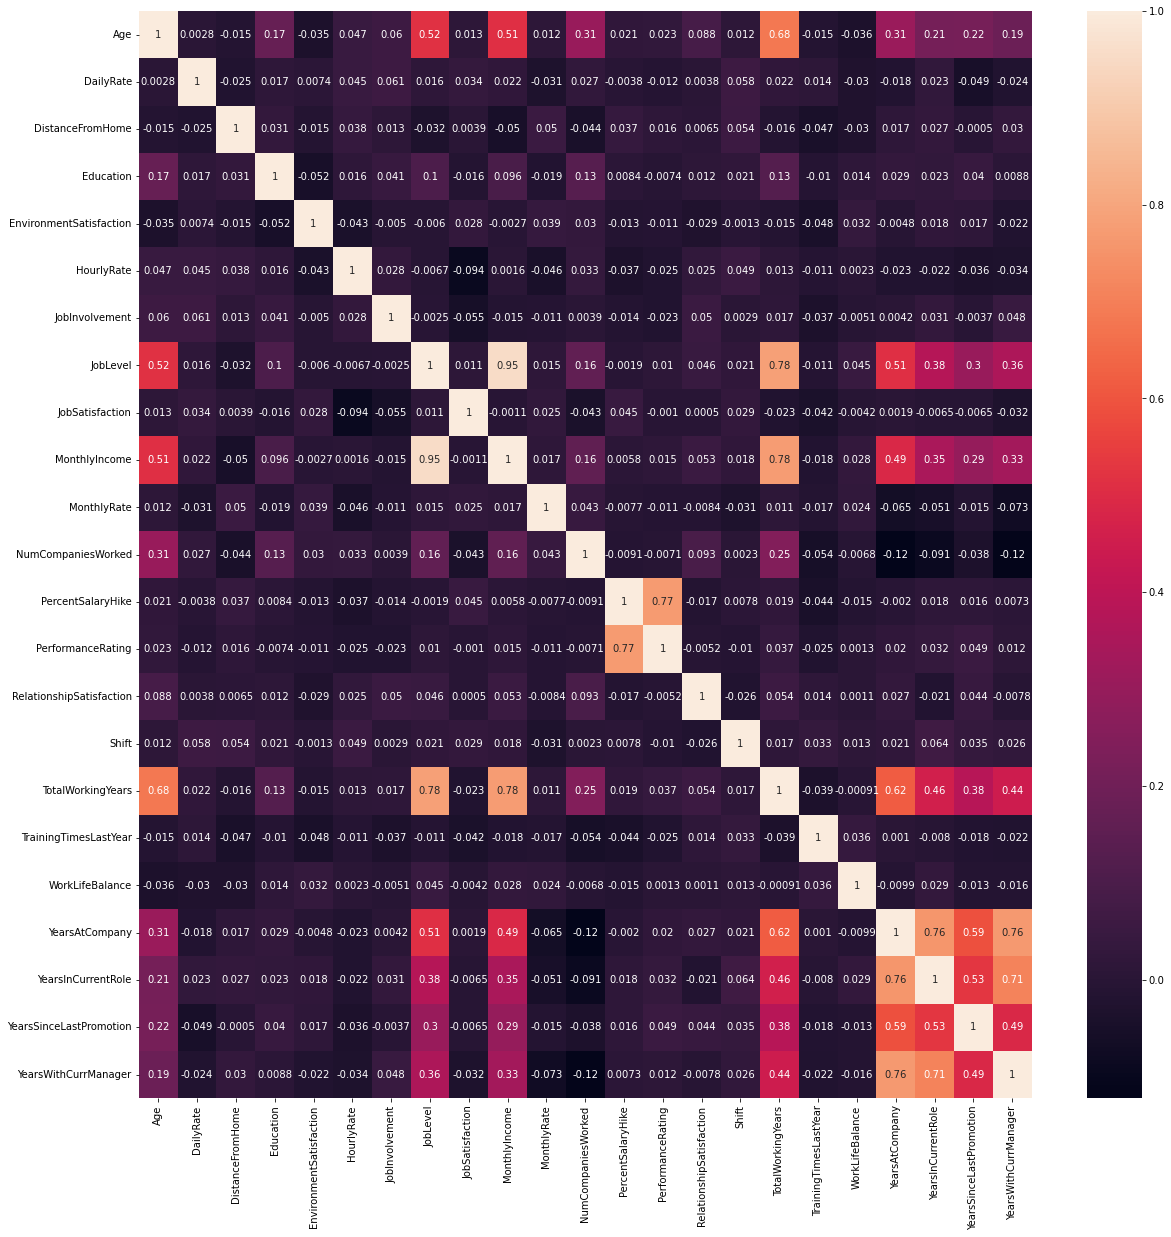

In [14]:
#Using Pearson Correlation
plt.figure(figsize=(20,20))
cor = X_train.corr()
sns.heatmap(cor, annot=True)
# annot=True is given to write the value inside each cell
plt.show()

In [16]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of the redundant columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
#             print(corr_matrix.columns[i],corr_matrix.columns[j])
            if(corr_matrix.iloc[i, j]) < threshold:
                colname = corr_matrix.columns[j]
                col_corr.add(colname)
    return col_corr

In [17]:
corr_features = correlation(X_train, 0) # 85% is a good value of the threshold
print(len(corr_features))
print(corr_features)

18
{'RelationshipSatisfaction', 'TrainingTimesLastYear', 'TotalWorkingYears', 'HourlyRate', 'MonthlyRate', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'Age', 'WorkLifeBalance', 'Education', 'DailyRate', 'PercentSalaryHike', 'JobSatisfaction', 'NumCompaniesWorked', 'DistanceFromHome', 'MonthlyIncome', 'PerformanceRating'}


In [19]:
hr.drop(columns = ['RelationshipSatisfaction', 'TrainingTimesLastYear', 'TotalWorkingYears', 'HourlyRate', 'MonthlyRate', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'Age', 'WorkLifeBalance', 'Education', 'DailyRate', 'PercentSalaryHike', 'JobSatisfaction', 'NumCompaniesWorked', 'DistanceFromHome', 'MonthlyIncome', 'PerformanceRating'],inplace=True)

In [20]:
hr.shape

(1676, 13)

## ONE HOT ENCODING

In [21]:
print(hr.dtypes)

Attrition                  object
BusinessTravel             object
Department                 object
EducationField             object
Gender                     object
JobRole                    object
MaritalStatus              object
OverTime                   object
Shift                       int64
YearsAtCompany              int64
YearsInCurrentRole          int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object


In [22]:
# s = pd.Series(list('abca'))
# print(s)
# print(pd.get_dummies(s))

In [23]:
for column in hr.columns:
    unique_vals = hr[column].unique()
    length = len(unique_vals)
    print("The number of values for feature {}: {} ---> {}".format(column, length, unique_vals))

The number of values for feature Attrition: 2 ---> ['No' 'Yes']
The number of values for feature BusinessTravel: 3 ---> ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
The number of values for feature Department: 3 ---> ['Cardiology' 'Maternity' 'Neurology']
The number of values for feature EducationField: 6 ---> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
The number of values for feature Gender: 2 ---> ['Female' 'Male']
The number of values for feature JobRole: 5 ---> ['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
The number of values for feature MaritalStatus: 3 ---> ['Single' 'Married' 'Divorced']
The number of values for feature OverTime: 2 ---> ['Yes' 'No']
The number of values for feature Shift: 4 ---> [0 1 3 2]
The number of values for feature YearsAtCompany: 37 ---> [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
The number of values for feature YearsInCurrentR

In [24]:
hr1 = pd.get_dummies(hr, columns = ['BusinessTravel', 'Department','EducationField'
      , 'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'Shift'])

In [25]:
print(hr1.shape)

(1676, 33)


In [26]:
list(hr1.columns)

['Attrition',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'BusinessTravel_Non-Travel',
 'BusinessTravel_Travel_Frequently',
 'BusinessTravel_Travel_Rarely',
 'Department_Cardiology',
 'Department_Maternity',
 'Department_Neurology',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'Gender_Female',
 'Gender_Male',
 'JobRole_Admin',
 'JobRole_Administrative',
 'JobRole_Nurse',
 'JobRole_Other',
 'JobRole_Therapist',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'OverTime_No',
 'OverTime_Yes',
 'Shift_0',
 'Shift_1',
 'Shift_2',
 'Shift_3']

## DATA RESAMPLING

In [27]:
hr1

,Attrition,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Cardiology,Department_Maternity,...,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Shift_0,Shift_1,Shift_2,Shift_3
0,No,6,4,0,5,0,0,1,1,0,...,0,0,0,1,0,1,1,0,0,0
1,No,10,7,1,7,0,1,0,0,1,...,0,0,1,0,1,0,0,1,0,0
2,Yes,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,1,1,0,0,0
3,No,8,7,3,0,0,1,0,0,1,...,0,0,1,0,0,1,1,0,0,0
4,No,2,2,2,2,0,0,1,0,1,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1671,Yes,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1672,No,3,2,1,2,0,0,1,1,0,...,0,0,1,0,0,1,0,1,0,0
1673,No,1,0,0,0,0,0,1,0,1,...,0,0,0,1,1,0,1,0,0,0
1674,No,21,6,11,8,0,0,1,0,0,...,1,0,1,0,1,0,0,1,0,0


In [28]:
X = hr1.drop(['Attrition'], axis=1)
y = hr1['Attrition']
for col in hr1.columns:
    print(col)

Attrition
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
BusinessTravel_Non-Travel
BusinessTravel_Travel_Frequently
BusinessTravel_Travel_Rarely
Department_Cardiology
Department_Maternity
Department_Neurology
EducationField_Human Resources
EducationField_Life Sciences
EducationField_Marketing
EducationField_Medical
EducationField_Other
EducationField_Technical Degree
Gender_Female
Gender_Male
JobRole_Admin
JobRole_Administrative
JobRole_Nurse
JobRole_Other
JobRole_Therapist
MaritalStatus_Divorced
MaritalStatus_Married
MaritalStatus_Single
OverTime_No
OverTime_Yes
Shift_0
Shift_1
Shift_2
Shift_3


In [29]:
# Apply SMOTE to the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y) # Resample the dataset

In [30]:
X_resampled

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Cardiology,Department_Maternity,Department_Neurology,...,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Shift_0,Shift_1,Shift_2,Shift_3
0,6,4,0,5,0,0,1,1,0,0,...,0,0,0,1,0,1,1,0,0,0
1,10,7,1,7,0,1,0,0,1,0,...,0,0,1,0,1,0,0,1,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
3,8,7,3,0,0,1,0,0,1,0,...,0,0,1,0,0,1,1,0,0,0
4,2,2,2,2,0,0,1,0,1,0,...,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2949,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0
2950,18,7,3,8,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2951,10,7,1,9,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2952,4,2,1,0,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [31]:
y_resampled

0        No
1        No
2       Yes
3        No
4        No
       ... 
2949    Yes
2950    Yes
2951    Yes
2952    Yes
2953    Yes
Name: Attrition, Length: 2954, dtype: object

In [32]:
counter = Counter(hr1["Attrition"])
print(counter)

Counter({'No': 1477, 'Yes': 199})


<AxesSubplot:>

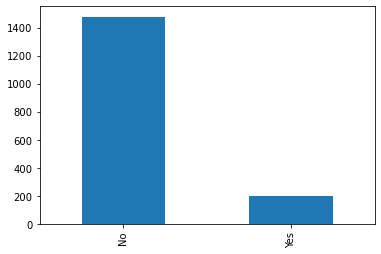

In [33]:
hr1['Attrition'].value_counts().plot(kind='bar')

In [34]:
counter=Counter(y_resampled)
print(counter)

Counter({'No': 1477, 'Yes': 1477})


<AxesSubplot:>

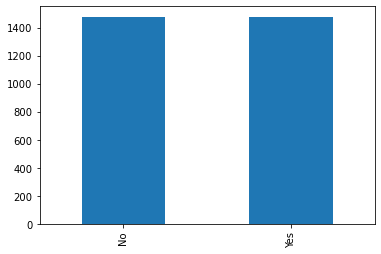

In [35]:
y_resampled.value_counts().plot(kind='bar')

## SCALING THE DATASET

In [36]:
X = X_resampled
y = y_resampled # Target Variable

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)

In [38]:
scale = ['YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager',
 'YearsSinceLastPromotion']
scaler = MinMaxScaler()

In [39]:
scaler.fit(X_train[scale])
X_train[scale] = scaler.transform(X_train[scale])
X_test[scale] = scaler.transform(X_test[scale])

In [40]:
X_train.head(10)

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Cardiology,Department_Maternity,Department_Neurology,...,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Shift_0,Shift_1,Shift_2,Shift_3
415,0.055556,0.111111,0.066667,0.000000,0,1,0,1,0,0,...,0,1,0,0,1,0,0,1,0,0
700,0.222222,0.222222,0.466667,0.411765,0,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
586,0.111111,0.166667,0.000000,0.176471,0,0,1,0,1,0,...,0,0,1,0,1,0,1,0,0,0
1344,0.277778,0.055556,0.000000,0.470588,0,1,0,0,0,1,...,0,0,0,1,1,0,1,0,0,0
2804,0.194444,0.388889,0.000000,0.411765,0,0,1,0,1,0,...,0,0,0,0,0,1,1,0,0,0
558,0.000000,0.000000,0.000000,0.000000,0,0,1,1,0,0,...,1,1,0,0,1,0,0,1,0,0
1929,0.055556,0.111111,0.133333,0.117647,0,0,1,0,1,0,...,0,0,0,1,0,1,1,0,0,0
306,0.361111,0.444444,0.266667,0.470588,0,0,1,1,0,0,...,0,0,1,0,1,0,0,1,0,0
2587,0.111111,0.111111,0.133333,0.000000,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2868,0.111111,0.166667,0.066667,0.000000,0,0,1,0,0,0,...,0,0,0,1,1,0,1,0,0,0


In [41]:
X_test.head(10)

,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Cardiology,Department_Maternity,Department_Neurology,...,JobRole_Therapist,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Shift_0,Shift_1,Shift_2,Shift_3
1255,0.027778,0.000000,0.000000,0.000000,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
737,0.083333,0.111111,0.066667,0.117647,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
2287,0.027778,0.000000,0.000000,0.000000,0,1,0,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2004,0.055556,0.111111,0.000000,0.117647,0,0,1,1,0,0,...,0,0,0,1,1,0,1,0,0,0
1791,0.000000,0.000000,0.000000,0.000000,0,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
98,1.027778,0.555556,0.066667,0.470588,0,0,1,1,0,0,...,0,0,0,1,1,0,1,0,0,0
2383,0.027778,0.000000,0.000000,0.000000,0,0,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0
255,0.111111,0.111111,0.066667,0.117647,0,0,1,0,0,1,...,1,0,1,0,1,0,0,0,1,0
192,0.027778,0.000000,0.000000,0.058824,0,0,1,0,1,0,...,1,0,1,0,0,1,1,0,0,0
870,0.194444,0.388889,0.066667,0.411765,0,0,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0


## Classification model

In [42]:
rm = RandomForestClassifier(random_state=42)

In [43]:
rm.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [44]:
prediction=rm.predict(X_train)
score1=accuracy_score(y_train,prediction)
print(len(prediction))
print(prediction[:50])

2510
['No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes'
 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [45]:
y_pred=rm.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(len(y_pred))
print(y_pred[:50])

444
['No' 'No' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'No'
 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No' 'Yes' 'Yes'
 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No'
 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'No']


In [46]:
print("training data accuracy is : %f" % (score1))
print("test data accuracy is : %f" % (score))

training data accuracy is : 0.994821
test data accuracy is : 0.957207
